# Computational Social Science Project #3 

*Group number:* 5

*Group members:* Steven Herrera Tenorio, Michi Kakebayashi, Daniela Perez, and Noah Bender   

*Semester:* Fall 2022

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn import tree
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [2]:
# Inspections Data 2011 - 2013
chicago_inspections_2011_to_2013 = pd.read_csv("data/Chicago Inspections 2011-2013.csv", 
                                              low_memory=False)

# Inspections Data 2014
chicago_inspections_2014 = pd.read_csv("data/Chicago Inspections 2014.csv", 
                                      low_memory=False)

In [3]:
chicago_inspections_2011_to_2013.shape

(17677, 75)

In [4]:
# Look at the inspections data
chicago_inspections_2011_to_2013.head()

,Inspection_ID,Inspection_Date,DBA_Name,AKA_Name,License,Facility_Type,Risk,Address,City,State,Zip,Inspection_Type,Results,Latitude,Longitude,Location,Facility_Type_Clean,criticalCount,seriousCount,minorCount,pass_flag,fail_flag,pastFail,pastCritical,pastSerious,pastMinor,timeSinceLast,firstRecord,ID,LICENSE_ID,ACCOUNT_NUMBER,LEGAL_NAME,DOING_BUSINESS_AS_NAME,ADDRESS,CITY,STATE,ZIP_CODE,WARD,PRECINCT,WARD_PRECINCT,POLICE_DISTRICT,LICENSE_CODE,LICENSE_DESCRIPTION,BUSINESS_ACTIVITY_ID,BUSINESS_ACTIVITY,LICENSE_NUMBER,APPLICATION_TYPE,LICENSE_TERM_START_DATE,LICENSE_TERM_EXPIRATION_DATE,LICENSE_STATUS,LATITUDE,LONGITUDE,minDate,maxDate,ageAtInspection,consumption_on_premises_incidental_activity,tobacco,package_goods,outdoor_patio,public_place_of_amusement,limited_business_license,childrens_services_facility_license,tavern,regulated_business_license,filling_station,caterers_liquor_license,mobile_food_license,precipIntensity,temperatureMax,windSpeed,humidity,heat_burglary,heat_garbage,heat_sanitation,criticalFound
0,269961,2013-01-31,SEVEN STAR,SEVEN STAR,30790,Grocery Store,Risk 3 (Low),3352 N BROADWAY,CHICAGO,IL,60657.0,Canvass,Pass,41.943359,-87.644999,"(41.943359344775146, -87.64499875300952)",Other,0,0,2,1,0,0,0,0,0,2.0,1,30790-20110416,2081412.0,63759.0,VIRGINIA DELA ROSA,SEVEN STAR,3352 N BROADWAY 1,CHICAGO,IL,60657.0,44.0,33.0,44-33,19.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,30790.0,RENEW,2011-04-16,2013-04-15,AAI,41.943359,-87.644999,2002-02-16,2015-04-15,10.964384,0,1,0,0,0,1,0,0,0,0,0,0,0.014587,53.496667,13.340000,0.900000,26.992376,12.768572,37.748787,0
1,507211,2011-10-18,PANERA BREAD,PANERA BREAD,1475890,Restaurant,Risk 1 (High),6059 N LINCOLN AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.991919,-87.709631,"(41.99191947239194, -87.70963133440333)",Restaurant,0,0,3,1,0,0,0,0,0,2.0,1,1475890-20110416,2081695.0,207283.0,"PANERA, LLC",PANERA BREAD,6059 N LINCOLN AVE C,CHICAGO,IL,60659.0,50.0,23.0,50-23,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1475890.0,RENEW,2011-04-16,2013-04-15,AAI,41.991919,-87.709631,2004-05-05,2019-04-15,7.457534,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,13.976557,12.895485,15.412267,0
2,507212,2011-10-18,LITTLE QUIAPO RESTAURANT,LITTLE QUIAPO RESTAURANT,1740130,Restaurant,Risk 1 (High),6259 N MCCORMICK RD,CHICAGO,IL,60659.0,Canvass,Fail,41.995632,-87.712707,"(41.99563177556418, -87.71270678169132)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1740130-20110216,2070145.0,3107.0,ENELITA GARCIA,LITTLE QUIAPO RESTAURANT,6259 N MCCORMICK RD,CHICAGO,IL,60659.0,50.0,25.0,50-25,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1740130.0,RENEW,2011-02-16,2013-02-15,AAI,41.995632,-87.712707,2007-03-22,2017-02-15,4.578082,0,0,0,0,0,0,0,0,0,0,0,0,0.001907,59.046667,13.016667,0.550000,12.611239,8.004220,8.320330,0
3,507216,2011-10-19,SERGIO'S TAQUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA,1447363,Restaurant,Risk 1 (High),3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,Canvass,Pass,41.982933,-87.710982,"(41.982933189164974, -87.71098225381141)",Restaurant,0,0,6,1,0,0,0,0,0,2.0,1,1447363-20110216,2071895.0,270993.0,SERGIO'S TAZUERIA PIZZA INC.,SERGIO'S TAQUERIA PIZZA INC.,3253 W BRYN MAWR AVE,CHICAGO,IL,60659.0,39.0,48.0,39-48,17.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1447363.0,RENEW,2011-02-16,2013-02-15,AAI,41.982933,-87.710982,2003-12-31,2019-02-15,7.805479,0,0,0,0,0,0,0,0,0,0,0,0,0.002737,56.153333,10.863333,0.616667,35.906383,26.238645,38.186618,0
4,507219,2011-10-20,TARGET STORE # T-2079,TARGET,1679459,Restaurant,Risk 2 (Medium),2112 W PETERSON AVE,CHICAGO,IL,60659.0,Canvass,Fail,41.990729,-87.682979,"(41.99072921796059, -87.68297945359863)",Restaurant,0,2,6,0,1,0,0,0,0,2.0,1,1679459-20100216,2009972.0,15538.0,TARGET CORPORATION,TARGET STORE # T-2079,2112 W PETERSON AVE,CHICAGO,IL,60659.0,40.0,18.0,40-18,24.0,1006.0,Retail Food Establishment,775,Retail Sales of Perishable Foods,1679459.0,RENEW,

In [5]:
# List column names
chicago_inspections_2011_to_2013.columns

Index(['Inspection_ID', 'Inspection_Date', 'DBA_Name', 'AKA_Name', 'License',
       'Facility_Type', 'Risk', 'Address', 'City', 'State', 'Zip',
       'Inspection_Type', 'Results', 'Latitude', 'Longitude', 'Location',
       'Facility_Type_Clean', 'criticalCount', 'seriousCount', 'minorCount',
       'pass_flag', 'fail_flag', 'pastFail', 'pastCritical', 'pastSerious',
       'pastMinor', 'timeSinceLast', 'firstRecord', 'ID', 'LICENSE_ID',
       'ACCOUNT_NUMBER', 'LEGAL_NAME', 'DOING_BUSINESS_AS_NAME', 'ADDRESS',
       'CITY', 'STATE', 'ZIP_CODE', 'WARD', 'PRECINCT', 'WARD_PRECINCT',
       'POLICE_DISTRICT', 'LICENSE_CODE', 'LICENSE_DESCRIPTION',
       'BUSINESS_ACTIVITY_ID', 'BUSINESS_ACTIVITY', 'LICENSE_NUMBER',
       'APPLICATION_TYPE', 'LICENSE_TERM_START_DATE',
       'LICENSE_TERM_EXPIRATION_DATE', 'LICENSE_STATUS', 'LATITUDE',
       'LONGITUDE', 'minDate', 'maxDate', 'ageAtInspection',
       'consumption_on_premises_incidental_activity', 'tobacco',
       'package_goods',

In [6]:
# Drop column names related to geography, identification, and pass/fail flags that perfectly predict the outcome
chicago_inspections_2011_to_2013.drop(columns = ['AKA_Name', 
                                                 'License',
                                                'Address',
                                                'City',
                                                'State',
                                                'Zip',
                                                'Latitude',
                                                'Longitude',
                                                'Location',
                                                'ID',
                                                'LICENSE_ID',
                                                 'LICENSE_TERM_START_DATE',
                                                 'LICENSE_TERM_EXPIRATION_DATE',
                                                 'LICENSE_STATUS',
                                                'ACCOUNT_NUMBER',
                                                'LEGAL_NAME',
                                                'DOING_BUSINESS_AS_NAME',
                                                'ADDRESS',
                                                'CITY',
                                                'STATE',
                                                'ZIP_CODE',
                                                'WARD',
                                                'PRECINCT',
                                                'LICENSE_CODE',
                                                'BUSINESS_ACTIVITY_ID',
                                                'BUSINESS_ACTIVITY',
                                                'LICENSE_NUMBER',
                                                'LATITUDE',
                                                'LONGITUDE',
                                                'pass_flag',
                                                'fail_flag'],
                                     inplace = True)

chicago_inspections_2011_to_2013.set_index(['Inspection_ID', 'DBA_Name'], inplace = True)

In [7]:
# Convert the Inspection Date to a datetime format
chicago_inspections_2011_to_2013['Inspection_Date'] = pd.to_datetime(chicago_inspections_2011_to_2013['Inspection_Date'], infer_datetime_format=True)  

## Visualization

What do inspections look like over time?

<AxesSubplot:title={'center':'Inspections by Month and Year'}, xlabel='Inspection_MonthYear'>

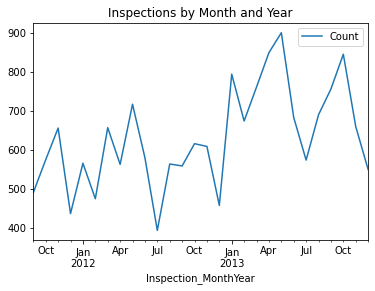

In [8]:
# Visualize Inspections Over Time
chicago_inspections_2011_to_2013['Inspection_MonthYear'] = chicago_inspections_2011_to_2013['Inspection_Date'].dt.to_period('M')
counts_by_day = chicago_inspections_2011_to_2013.groupby('Inspection_MonthYear').count().rename(columns = {'Facility_Type': 'Count'})['Count'].reset_index()
counts_by_day.set_index(["Inspection_MonthYear"], inplace = True)
counts_by_day.plot(title = "Inspections by Month and Year") 

What do the results look like? 

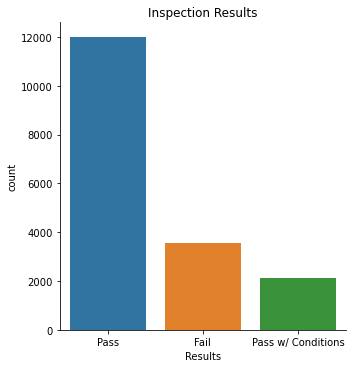

In [9]:
# Inspection Results
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count")

plt.title("Inspection Results")
plt.show()

What if we separate by facility type?

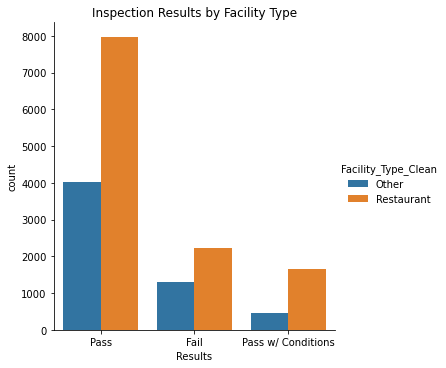

In [10]:
# Inspection Results by Facility Type (Restaurant or Not)
sns.catplot(data = chicago_inspections_2011_to_2013,
           x = "Results",
           kind = "count",
           hue = 'Facility_Type_Clean')

plt.title("Inspection Results by Facility Type")
plt.show()

## Preprocess Data

In [11]:
# Drop datetime info
chicago_inspections_2011_to_2013 = chicago_inspections_2011_to_2013.dropna().drop(['Inspection_Date',
                                      'minDate',
                                      'maxDate',
                                      'Inspection_MonthYear'],
                                      axis = 1)

In [48]:
# Set target variable. 
y = chicago_inspections_2011_to_2013['Results']
## Check for both targets with binary and ternary outcomes
## e.g., y_binary = {Pass (Includes Pass w/ Conditions), Fail}, y_ternary = {Pass, Fail, Pass w/ Conditions}
y_binary = y.replace({'Pass w/ Conditions': 'Pass'})
y_ternary = y
lb_style = LabelBinarizer()
y_binary = lb_style.fit_transform(y_binary)
y_ternary = np.transpose([y_ternary.replace({'Pass': 0, 'Fail': 1, 'Pass w/ Conditions': 2})])
# Recode 0s and 1s so 1s are "Fail"
y_binary = np.where(y_binary == 1, 0 ,1)

# All other features in X
X = chicago_inspections_2011_to_2013.drop(columns = ['Results'])
X = pd.get_dummies(X)

# Set seed
np.random.seed(10)

# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y_ternary, 
                                                    train_size = .80, test_size=0.20, stratify=y_ternary)
X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, 
                                                            train_size = .75, test_size = .25, stratify = y_train)

In [51]:
# Ternary outcome variables
y_train_ternary = y_train.copy()
y_test_ternary = y_test.copy()
y_validate_ternary = y_validate.copy()

# Binary outcome variables
y_train_binary = y_train.copy()
y_train_binary[y_train_binary == 2] = 0
y_test_binary = y_test.copy()
y_test_binary[y_test_binary == 2] = 0
y_validate_binary = y_validate.copy()
y_validate_binary[y_validate_binary == 2] = 0

#Attributes X, are the same for both

In [55]:
X_train.head()

criticalCount  seriousCount  \
Inspection_ID DBA_Name                                                         
1134707       POLLITOS GRILL & ROTISSERIE                    0             0   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.              0             0   
1092401       URBAN VEGAN                                    1             2   
537710        KENYATTA'S DAYCARE                             0             1   
598482        1 2 3 EXPRESS                                  0             0   

                                                 minorCount  pastFail  \
Inspection_ID DBA_Name                                                  
1134707       POLLITOS GRILL & ROTISSERIE                 5         0   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.           5         0   
1092401       URBAN VEGAN                                 2         1   
537710        KENYATTA'S DAYCARE                          5         0   
598482        1 2 3 EXPRESS                               4         0   

                                                 pastCritical  pastSerious  \
Inspection_ID DBA_Name                                                       
1134707       POLLITOS GRILL & ROTISSERIE                   0            0   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.             0            0   
1092401       URBAN VEGAN                                   4            2   
537710        KENYATTA'S DAYCARE                            0            0   
598482        1 2 3 EXPRESS                                 0            0   

                                                 pastMinor  timeSinceLast  \
Inspection_ID DBA_Name                                                      
1134707       POLLITOS GRILL & ROTISSERIE                6       0.961644   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.          0       2.000000   
1092401       URBAN VEGAN                                6       0.638356   
537710        KENYATTA'S DAYCARE                         0       2.000000   
598482        1 2 3 EXPRESS                              0       2.000000   

                                                 firstRecord  POLICE_DISTRICT  \
Inspection_ID DBA_Name                                                          
1134707       POLLITOS GRILL & ROTISSERIE                  0              1.0   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.            1             11.0   
1092401       URBAN VEGAN                                  0             19.0   
537710        KENYATTA'S DAYCARE                           1              3.0   
598482        1 2 3 EXPRESS                                1              9.0   

                                                 ageAtInspection  \
Inspection_ID DBA_Name                                             
1134707       POLLITOS GRILL & ROTISSERIE               5.079452   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.         8.317808   
1092401       URBAN VEGAN                               1.969863   
537710        KENYATTA'S DAYCARE                        9.769863   
598482        1 2 3 EXPRESS                             3.449315   

                                                 consumption_on_premises_incidental_activity  \
Inspection_ID DBA_Name                                                                         
1134707       POLLITOS GRILL & ROTISSERIE                                                  0   
1326599       HO FAT LEE CHINESE KITCHEN, I NC.                                            0   
1092401       URBAN VEGAN                                                                  0   
537710        KENYATTA'S DAYCARE                                                           0   
598482        1 2 3 EXPRESS                                                                0   

                                                 tobacco  package_goods  \
Inspection_ID DBA_Name                                                    
1134707       POLLITO

## Fit Models

Be sure to do the following:

1. Import the appropriate library from sklearn
2. Set up a hyperparameter grid (check out our previous labs to see how to do this)
3. Find the best hyperparameters, and then fit your model (using train/validation splits or cross-validation)

## Model 1 (Decision Trees: Steven)

**Logic**: We use decision trees to predict where each observation belongs in the "most commonly occurring class of training observations in the region to which it belongs." Using this method, we can understand the class prediction corresponding to a particular node region AND the class proportions among the training observations that fall into that region.

**Assumptions**: If we assume the relationship between the features and our respone variable, **Inspection Result**, to be non-linear and complex, then decision trees are preferred over linear regression.

**Pros**: Very easy to explain, mirror decision-making among humans than other classification techniques, can be displayed graphically, and can handle qualitative predictors without needing to make dummy variables.

**Cons**: Usually have less predictive accuracy than traditional regression techniques and can lack robustness.

**Why It's a Plausible Choice**: We are interested in assessing which variables (and by how much) influence the decision-making of an inspector's choice. Below, we assess two models: one with the binary outcome (Pass or Fail), and another with a ternary outcome (Pass, Fail, or Pass with Conditions).

### Binary Outcome Model

In [56]:
# Initialize a Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [57]:
# Decision Tree Model for Binary Outcome
dt_model_binary = dt_classifier.fit(X_train, y_train_binary)

#Hyperparamater Grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1,2],
              'random_state': [10, 20]}

# Finding the Best Parameters with Hyperparameter Grid Search
dt_grid_binary = GridSearchCV(dt_model_binary, param_grid, cv=3)

In [58]:
# Fit the Best Parameters
dt_grid_binary.fit(X_train,y_train_binary)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(min_impurity_decrease=1e-07,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'random_state': [10, 20],
                         'splitter': ['best', 'random']})

In [59]:
# Get Best Parameter Conditions
before_binary_pred = dt_model_binary.predict(X_validate)
best_index_binary = np.argmax(dt_grid_binary.cv_results_["mean_test_score"])
best_binary_pred = dt_grid_binary.best_estimator_.predict(X_validate)
print("Best Parameters w/ Binary Outcome: ", dt_grid_binary.cv_results_["params"][best_index_binary])

Best Parameters w/ Binary Outcome:  {'criterion': 'log_loss', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}


### Validation Metrics for Binary Outcome Model

In [60]:
# Before Hyperparameter Tuning
print("Accuracy:", accuracy_score(before_binary_pred, y_validate_binary))
print("Precision:", precision_score(before_binary_pred, y_validate_binary))
print("Recall:", recall_score(before_binary_pred, y_validate_binary))
print("F1 Score:", f1_score(before_binary_pred, y_validate_binary))

Accuracy: 0.9098628347485304
Precision: 0.8038897893030794
Recall: 0.7619047619047619
F1 Score: 0.7823343848580441


In [61]:
# After Hyperparameter Tuning
print("Accuracy:", accuracy_score(best_binary_pred, y_validate_binary))
print("Precision:", precision_score(best_binary_pred, y_validate_binary))
print("Recall:", recall_score(best_binary_pred, y_validate_binary))
print("F1 Score:", f1_score(best_binary_pred, y_validate_binary))

Accuracy: 0.9118223383409536
Precision: 0.7941653160453809
Recall: 0.7740916271721959
F1 Score: 0.784


Above, I have identified accuracy, recall, precision, and F1 scores for both models with binary outcomes, one before hyperparameter tuning and the other after. For predictive auditing, we want to prioritize the ability of our model to correctly place observations in the appropriate response variable categories, hence the F1 score is the prioritized measure. Accuracy tells us the number of correct predictions/total observations, precision tells us the number of true correct predictions/number of those predicted as correct (or how precise the model is at predicting a specific category), and recall is the number of true correct predictions/number of observations actually correct (or how sensitive the model is in detecting a specific category). The F1 score is advantageous because we care both about precision and recall, especially over accuracy alone, and this score is the harmonic mean between both values. In this case, the model after hyperparameter tuning with a binary outcome is preferred.

### Ternary Outcome Model

In [62]:
# Initialize a Decision Tree Classifier
dt_classifier = tree.DecisionTreeClassifier(criterion='gini',  # or 'entropy' for information gain
                       splitter='best',  # or 'random' for random best split
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [63]:
# Decision Tree Model for Ternary Outcome
dt_model_ternary = dt_classifier.fit(X_train, y_train_ternary)

#Hyperparamater Grid
param_grid = {'criterion': ['gini', 'entropy', 'log_loss'],
              'splitter': ['best', 'random'],
              'min_samples_split': [2, 3],
              'min_samples_leaf': [1,2],
              'random_state': [10, 20]}

# Finding the Best Parameters with Hyperparameter Grid Search
dt_grid_ternary = GridSearchCV(dt_model_ternary, param_grid, cv=3)

In [64]:
# Fit the Best Parameters
dt_grid_ternary.fit(X_train,y_train_ternary)

GridSearchCV(cv=3,
             estimator=DecisionTreeClassifier(min_impurity_decrease=1e-07,
                                              random_state=10),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3], 'random_state': [10, 20],
                         'splitter': ['best', 'random']})

In [65]:
# Get Best Parameter Conditions
before_ternary_pred = dt_model_ternary.predict(X_validate)
best_index_ternary = np.argmax(dt_grid_ternary.cv_results_["mean_test_score"])
best_ternary_pred = dt_grid_ternary.best_estimator_.predict(X_validate)
print("Best Parameters w/ Ternary Outcome: ", dt_grid_ternary.cv_results_["params"][best_index_ternary])

Best Parameters w/ Ternary Outcome:  {'criterion': 'log_loss', 'min_samples_leaf': 1, 'min_samples_split': 2, 'random_state': 10, 'splitter': 'best'}


### Validation Metrics for Ternary Outcome Model

In [66]:
# Before Hyperparameter Tuning
print("Accuracy:", accuracy_score(before_ternary_pred, y_validate_ternary))
print("Precision:", precision_score(before_ternary_pred, y_validate_ternary, average=None))
print("Recall:", recall_score(before_ternary_pred, y_validate_ternary, average=None))
print("F1 Score:", f1_score(before_ternary_pred, y_validate_ternary, average=None))

Accuracy: 0.9026779882429784
Precision: [0.99366472 0.79578606 0.59541985]
Recall: [0.99318071 0.75076453 0.65915493]
F1 Score: [0.99342266 0.77261998 0.62566845]


In [67]:
# After Hyperparameter Tuning
print("Accuracy:", accuracy_score(best_ternary_pred, y_validate_ternary))
print("Precision:", precision_score(best_ternary_pred, y_validate_ternary, average=None))
print("Recall:", recall_score(best_ternary_pred, y_validate_ternary, average=None))
print("F1 Score:", f1_score(best_ternary_pred, y_validate_ternary, average=None))

Accuracy: 0.9137818419333769
Precision: [0.99122807 0.81685575 0.66157761]
Recall: [0.99267936 0.78018576 0.70844687]
F1 Score: [0.99195318 0.79809976 0.68421053]


Here, since we are using a multiclass label, identifying precision, recall, and F1 scores are slightly different, since what is considered the 'positive' case is not defined neatly. Instead of finding some average algorthm, I display the values for when each iteration is considered the "positive" case (e.g., when 0 is positive and 1 and 2 are negative, then the precision score is in the first placement of the array; when 1 is positive and 0 and 2 are negative, then precision score is in the second placement, etc.) Still prioritizing the F1 scores, the model before hyperparamter tuning with ternary outcome does slightly better than the one with hyperparameter tuning when the positive case are those values with "Pass." However, when the positive cases are either those with "Fail" or "Pass w/ Conditions," the model with hyperparameter tuning does much better for F1 scores. For example, when the positive case is "Pass w/ Conditions," the F1 score for the model with hyperparameter tuning has a score of 0.672 versus 0.663 with the one without hyperparameter turning. Based on this, the model with hyperparameter tuning is better.

### Comparing Binary vs. Ternary Models After Hyperparameter Tuning

The F1 score for the binary outcome model after hyperparameter tuning was 0.77662129703763, while for the ternary outcome model it was |0.99318403 when positive = 0, 0.80410742 when positive = 1, 0.672 when positive = 2|. If only considering accuracy, the ternary outcome model performs better (0.9147615937295885 vs. 0.9088830829523188), but as mentioned before, justification matters more with F1 score considerations. If we care more about getting a higher F1 score when the 'positive' case is "Pass" (and 'negative' is "Fail" or "Pass w/ Conditions") or when the 'positive' case is "Fail" (and 'negative' is "Pass" or "Pass w/ Conditions"), but are okay with having a lower F1 score when the 'positive' case is "Pass w/ Conditions" (and 'negative' is "Pass" or "Fail"), then the ternary model is better. Overall, I find it justifiable to consider the ternary model because F1 considerations are generally more important when the positive cases are "Pass" or "Fail." Below, I show the most important features for this model.

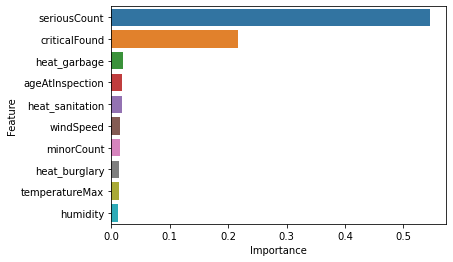

In [68]:
# Getting the most informative features with the ternary outcome
import seaborn as sns
feat_importances = pd.concat([pd.DataFrame(X_train.columns),pd.DataFrame(np.transpose(dt_model_ternary.feature_importances_))], axis = 1)
feat_importances.columns = ["Feature", "Importance"]
sns.barplot(x = "Importance", y = "Feature", data = feat_importances.nlargest(10, 'Importance'))
plt.show()

The two features with the largest importance values are `seriousCount` and `criticalFound`.

## Model 2 (Ensemble methods)
Logic: We use Ensemble methods to combine the predictions of several base estimators built with a given learning algorithm in order to improve generalizability / robustness over a single estimator.

Assumptions: The same with the decision trees, if we assume the relationship between the features and our respone variable, Inspection Result, to be non-linear and complex, then decision trees are preferred over linear regression. The ensemble methods will be more accurate.

Pros: By taking a majority vote of various algorithms it is fair. This process typically reduces variance and provides more robust models.

Cons: Ensembles can be more difficult to interpret. .

Why It's a Plausible Choice: Like the decision tree we are interested in assessing which variables (and by how much) influence the decision-making of an inspector's choice. However, we want to make a robust model with this ensemble method.

In [67]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AValidation Metrics for Ternary Outcome ModeldaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier# Logistic Regression - using liblinear solver


SyntaxError: invalid syntax (2901185340.py, line 5)

In [ ]:
# Logistic Regression - using liblinear solver
log_reg = LogisticRegression(random_state = 10, solver='liblinear')

In [ ]:
# Random Forest
rf_classifier = RandomForestClassifier(criterion='gini',  # or 'entropy' for information gain
                       max_depth=None,  # how deep tree nodes can go
                       min_samples_split=2,  # samples needed to split node
                       min_samples_leaf=1,  # samples needed for a leaf
                       min_weight_fraction_leaf=0.0,  # weight of samples needed for a node
                       max_features=None,  # number of features to look for when splitting
                       max_leaf_nodes=None,  # max nodes
                       min_impurity_decrease=1e-07, #early stopping
                       random_state = 10) #random seed

In [ ]:
# AdaBoost
ada_classifier = AdaBoostClassifier(n_estimators=100)

voting_classifier = VotingClassifier(
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)],
                        voting = 'hard')

In [ ]:
# Loop through each model to report Accuracy
for clf, label in zip([log_reg, 
                       rf_classifier, 
                       ada_classifier, 
                       voting_classifier], ['Logistic Regression', 
                                            'Random Forest', 
                                            'Ada Boost',
                                            'Ensemble']):
         scores = cross_val_score(clf, X, y.ravel(), scoring='accuracy', cv=5)
         print('Accuracy: %0.2f [%s]' % (scores.mean(), label))

In [ ]:
#Soft Voting
voting_classifier = VotingClassifier(
                        estimators = [('lr', log_reg),
                                     ('rf', rf_classifier),
                                     ('ada', ada_classifier)],
                        voting = 'soft')

probas = [c.fit(X, y.ravel()).predict_proba(X)[:,1] for c in (log_reg, rf_classifier, ada_classifier, voting_classifier)]

In [ ]:
probs_df = pd.DataFrame.from_records(probas).T
probs_df.rename(columns = {0: 'logit',
                          1: 'rf',
                          2: 'ada',
                          3: 'ensemble'}, inplace = True)
probs_df.head()

In [ ]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
ax = fig.add_subplot(2, 2, 1)
sns.histplot(probs_df, x = "logit", ax = ax)
ax = fig.add_subplot(2, 2, 2)
sns.histplot(probs_df, x = "rf", ax = ax)
ax = fig.add_subplot(2, 2, 3)
sns.histplot(probs_df, x = "ada", ax = ax)
ax = fig.add_subplot(2, 2, 4)
sns.histplot(probs_df, x = "ensemble", ax = ax)
plt.show()

## Model 3: Support Vector Machine (Noah)

**Logic**: Our data set is relatively sparse - a condition under which support vector machines (SVMs) have proven especially effective. Furthermore, SVMs are particularly sensitive to outliers, which will help to efficiently select which establishments should be audited. 

**Assumptions**: As with the previous models, SVMs are well adapted to non-linear data, but at the cost of opaque and sometimes difficult to interpret results. 

**Pros**: 

**Cons**: As noted above, SVMs are black boxes. The tradeoff in this case is worth making because the stakes of a false alarm are relatively modest. If the model flags a restaurant which then passes inspection, little is lost. It will however be necessary to monitor the performance of the SVM to ensure that it is not systematically overlooking unsanitary establishments. 

**Why it's a Plausible Choice**: The sensitivity of SVMs to outliers make them a plausible choice for this application. It is less important for the model to scrutinize restaurants which will obviously and by a wide margin pass or fail inspection. Since conserving the city of Chicago's resources is a priority, a model with sensitivity to outliers--specifically boundary cases--is especially appropriate.

In [73]:
#Import SVM
from sklearn import svm
from sklearn.svm import SVC 

In [71]:
#Set up test-train split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .80, test_size=0.20,
                                                   stratify=y)

X_train, X_validate, y_train, y_validate = train_test_split(X_train, y_train, train_size = .75, test_size = .25, 
                                                           stratify = y_train)

In [74]:
#Create the model
svm = SVC()

#Fit model
svm_model = svm.fit(X_train, y_train.ravel())


In [84]:
#hyperparamater tuning
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore')
from sklearn.metrics import accuracy_score

param_grid = {'kernel': ['linear','poly','rbf','sigmoid'], 
             'C': np.arange(.1,1,1),
               'degree': [1,2,3], 
              'gamma': ['scale','auto']}

svm_grid = GridSearchCV(svm_model, param_grid, cv=3)
svm_grid.fit(X_train, y_train.ravel())

best_index = np.argmax(svm_grid.cv_results_["mean_test_score"])
best_svm_pred = svm_grid.best_estimator_.predict(X_validate)

print(svm_grid.cv_results_["params"][best_index])
print('Validation Accuracy', accuracy_score(best_svm_pred, y_validate))

{'C': 0.1, 'degree': 1, 'gamma': 'scale', 'kernel': 'linear'}
Validation Accuracy 0.9199869366427171


## Validation Metrics

**Hint**: Try writing a for loop to use [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) to check for accuracy, precision, recall and f1 across all of your models.

## Policy Simulation

### Interpretable Machine Learning

**Hint**: Use tools like feature importance plots and coefficient plots

## Prioritize Audits

**Hint**: Look up the [`.predict()`](https://www.kite.com/python/docs/sklearn.linear_model.SGDRegressor.predict), [`.predict_proba()`](https://www.kite.com/python/docs/sklearn.linear_model.LogisticRegression.predict_proba), and [`.sample()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) methods. Then: 
1. Choose one of your models (or train a new simplified model or ensemble!) to predict outcomes and probabilities. 
2. Order your audits by their probability of detecting a "Fail" score
3. Plot your distribution of pass/fail among the first 1000 observations in the dataset
4. Simulate random audits on the full chicago_2011_to_2013.csv dataset by picking 1000 observations at random

### Predict on Data with Unseen Labels

In [ ]:
# Fill in the code below with the X data you used for training
X_test = chicago_inspections_2014[chicago_inspections_2014.columns & ....columns]

### Discussion Questions

5.1 Why do we need metrics beyond accuracy when using machine learning in the social sciences and public policy?

**Answer**: There is a temptation to believe that because machine learning algorithms are mathematical they are also transparent and impartial in ways that human decision makers are not. This is not always the case, however, and the human consequences can be devastating. The case of COMPAS, an algorithm used to aid judges in making pretrial detention decisions, makes this clear - the algorithm has been to shown to jail lower-risk black defendents at a far higher rate than their white counterparts. The system was nonetheless equally accurate in its assessment of the risk posed by black and white defendents. The consequences are rarely so dramatic, but the COMPAS case illustrates the need for extreme care in implementing machine learning solutions in public policy. Social scientists, too, have a duty to take necessary precautions, but in most cases the stakes are far lower. 

In the case of health inspections in Chicago, it is easy to see how an algorithm could replicate biases common among inspectors. For example, inspectors may be likely to rate violations in restaurants serving certain ethnic cuisines more severely than similar violations in "American" restaurants. If this were the case, then the algorithm could learn to regard such restaurants as dirty and disproportionately flag them for audit. 

5.2 Imagine that establishments learned about the algorithm being used to determine who gets audited and
they started adjusting their behavior (and changing certain key features about themselves that were 
important for the prediction) to avoid detection. How could policymakers address this interplay between algorithmic decisionmaking and real world behavior?

**Answer**: Several strategies could be deployed to mitigate the risk of restaurateurs gaming the algorithm to evade audits. The city government could keep the algorithm a secret, for example. But if fairness concerns arise then there will be legitimate demands for transparency. In the long term, therefore, secrecy is not a promising strategy. A more robust approach would combine algorithmically directed audits with a certain number of entirely random audits. Officials could then monitor the results of random audits to detect evasion. If the random audits of restaurants which would be predicted to pass in fact yield failing scores, this may be evidence of manipulation. 